In [1]:
%matplotlib inline
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as st
import seaborn as sns
import plotly.graph_objects as go
from typing import Dict, Any, Optional
import plotly.express as px
import ast

_RESNET18_BENCHMARK=0.9545
_WIDE_RESNET_BENCHMARK=0.95
_IMAGENET_BENCHMARK=0.7674
_BEST_MIN_SAL_THRES=0.3
_GROUPBY_VARS = [
    "rigl.const_fan_in",
    "rigl.dense_allocation",
    "rigl.dynamic_ablation",
    "rigl.min_salient_weights_per_neuron",
]
_SUMMARY_COLS = [
    "name",
    "sweep_id",
    "tags",
    "best_accuracy",
    "rigl.const_fan_in",
    "rigl.dense_allocation",
    "rigl.min_salient_weights_per_neuron",
    "epoch"
]
plt.style.use("../plt_plot_style.mplstyle")

In [2]:
def fill_na_cols(df):
    df["rigl.min_salient_weights_per_neuron"] = df["rigl.min_salient_weights_per_neuron"].fillna(0)
    df["rigl.dynamic_ablation"] = df["rigl.dynamic_ablation"].fillna(False)
    df.loc[df["model.name"].isna(), "model.name"] = df["model"]
    df.loc[df["model"].isna(), "model"] = df["model.name"]
    return df
df = pd.read_csv("../processed_results.csv", index_col="id")
df = fill_na_cols(df)
df.head()

/tmp/ipykernel_86053/527118440.py:7: DtypeWarning: Columns (14,15,16,19,20,21,22,23,27,28,29,31,33,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

,ITOP Rate,Learning Rate,Training Loss,Unnamed: 0,_PRUNING_RATE,_TOTAL_ACTIVE_NEURONS,_TOTAL_PERCENTAGE_ACTIVE_NEURONS,_runtime,_step,_timestamp,...,z-module.layer4.2.conv3-Max-Grad-Per-Filter.values,z-module.layer4.2.conv3-Max-Inactive_Grad,z-module.layer4.2.conv3-Max-Inactive_Weight,z-module.layer4.2.conv3-Max-Weight-Per-Filter._type,z-module.layer4.2.conv3-Max-Weight-Per-Filter.bins,z-module.layer4.2.conv3-Max-Weight-Per-Filter.values,z-module.layer4.2.conv3-Weight-Dist._type,z-module.layer4.2.conv3-Weight-Dist.bins,z-module.layer4.2.conv3-Weight-Dist.values,z-module.layer4.2.conv3_total-active-neurons
id,,,,,,,,,,,,,,,,,,,,,
y1smgw70,0.999447,0.0008,0.030942,0,8.651855e-08,1499.0,94.040151,7763.0,97500.0,1.674237e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3yiuvg1j,0.999341,0.0008,0.032477,1,8.651855e-08,1499.0,94.040151,7540.0,97500.0,1.674236e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0qam6if8,0.999310,0.0008,0.052932,2,8.651855e-08,1495.0,93.789210,4213.0,97500.0,1.674233e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62biezd7,0.999316,0.0008,0.046383,3,8.651855e-08,1502.0,94.228356,5522.0,97500.0,1.674234e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cvy170gb,0.999118,0.0008,0.041465,4,8.651855e-08,1510.0,94.730238,7490.0,97500.0,1.674236e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# import subprocess
# import glob
# import datetime
# import re


# for model in ["resnet18", "wide_resnet22"]:
#     for _DENSE_ALLOC in [0.01, 0.05, 0.1]:
#         for _MIN_SAL in [0.30, 0.40, 0.5]:
for model in ["resnet18",]:
    for _DENSE_ALLOC in [0.01,]:
        for _MIN_SAL in [0.5]:
            df_slice = df.loc[
                (df["sweep_id"]=="1fik36lx") & \
                (df["tags"].str.contains("sweep_1fik36lx")) & \
                (df["model"]==model) & \
                (df["rigl.dense_allocation"] == _DENSE_ALLOC)  & \
                (df["rigl.min_salient_weights_per_neuron"] == _MIN_SAL)
            ]
            print(model, _DENSE_ALLOC, _MIN_SAL)
            ids = df_slice.index.values
            print(ids)
            # g = glob.glob("../artifacts/checkpoints/*")
            # for i, row in df_slice.iterrows():
            #     id = row.name
            #     date_str = datetime.datetime.fromtimestamp(row._timestamp)
            #     src_dir = f"../artifacts/checkpoints/{date_str.strftime('%Y%m%d')}_{id}"
            #     # assert src_dir in g
            #     target_dir = f"../artifacts/checkpoints/for_anna_2/{model}-{(1-_DENSE_ALLOC)*100:.0f}-{_MIN_SAL*100:.0f}"
            #     if src_dir not in g:
            #         src_dir = f"../artifacts/checkpoints/{(date_str - datetime.timedelta(days=2)).strftime('%Y%m%d')}_{id}"
            #         if src_dir not in g:
            #             src_dir = f"../artifacts/checkpoints/{(date_str - datetime.timedelta(days=1)).strftime('%Y%m%d')}_{id}"
            #             if src_dir not in g:
            #                 print(f'Cant find {src_dir}')
            #     args = f"mkdir -p {target_dir}"
            #     # print(args)
            #     subprocess.call(args.split(" "))
            #     args = f"cp -r {src_dir} {target_dir}"
            #     # print(args)
            #     subprocess.call(args.split(" "))

resnet18 0.01 0.5
['f75f6a5m' '2jjmdzam' 'tkcz3emd' '37my33se']


In [19]:
df.loc[ids][["rigl.dense_allocation", "rigl.min_salient_weights_per_neuron"]]

,rigl.dense_allocation,rigl.min_salient_weights_per_neuron
id,,
26t97fyn,0.01,0.5
f75f6a5m,0.01,0.5
2jjmdzam,0.01,0.5
tkcz3emd,0.01,0.5
37my33se,0.01,0.5


In [17]:
from rigl_torch.utils.checkpoint import Checkpoint
id=ids[0]

chkp = Checkpoint.load_last_checkpoint(checkpoint_dir = cfg.paths.checkpoint, run_id=id)

NameError: name 'cfg' is not defined

In [44]:


datetime.datetime.fromtimestamp(1.674237e+09)

datetime.datetime(2023, 1, 20, 17, 50)

In [48]:
date_str.strftime("%Y-%m-%d")

'2022-05-07'

In [65]:
df_slice = df.loc[
    (df["sweep_id"]=="1fik36lx")]
    # (df["model"]==model) & \
    # (df["rigl.dense_allocation"] == _DENSE_ALLOC)  & \
    # (df["rigl.min_salient_weights_per_neuron"] == _MIN_SAL
df_slice["rigl.dense_allocation"].unique()

array([0.5 , 0.4 , 0.3 , 0.2 , 0.1 , 0.05, 0.01])

In [71]:
df.loc[df["sweep_id"]=="1fik36lx"]
_MIN_SAL=0.30
_DENSE_ALLOC=0.01
import subprocess
import glob
import datetime
import re


for model in ["resnet18", "wide_resnet22"]:
    for _DENSE_ALLOC in [0.01, 0.05, 0.1]:
        for _MIN_SAL in [0.30, 0.40, 0.5]:
            df_slice = df.loc[
                (df["sweep_id"]=="1fik36lx") & \
                (df["model"]==model) & \
                (df["rigl.dense_allocation"] == _DENSE_ALLOC)  & \
                (df["rigl.min_salient_weights_per_neuron"] == _MIN_SAL)
            ]
            g = glob.glob("../artifacts/checkpoints/*")
            for i, row in df_slice.iterrows():
                id = row.name
                date_str = datetime.datetime.fromtimestamp(row._timestamp)
                src_dir = f"../artifacts/checkpoints/{date_str.strftime('%Y%m%d')}_{id}/"
                # assert src_dir in g
                target_dir = f"../artifacts/checkpoints/for_anna_2/{model}-{(1-_DENSE_ALLOC)*100:.0f}-{_MIN_SAL*100:.0f}"
                args = f"mkdir -p {target_dir}"
                print(args)
                # subprocess.call(args.split(" "))
                args = f"cp -r {src_dir} {target_dir}"
                print(args)
                # subprocess.call(args.split(" "))

# tar_dir = re.search(r".*hqq1xsw1.*", g)
# tar_dir.group(0)
# checkpoint_dirs = f"ls ../artifacts/checkpoints/ | grep {df.loc[df['sweep_id']=='1fik36lx'].index[0]}".split(" ")
# subprocess.call(target_dir)
# args = "cp -r ../artifacts/checkpoints/"
# subprocess.call


mkdir -p ../artifacts/checkpoints/resnet18-99-30
cp -r ../artifacts/checkpoints/20230112_vm6rovad/ ../artifacts/checkpoints/resnet18-99-30
mkdir -p ../artifacts/checkpoints/resnet18-99-30
cp -r ../artifacts/checkpoints/20230112_uhrwb60v/ ../artifacts/checkpoints/resnet18-99-30
mkdir -p ../artifacts/checkpoints/resnet18-99-30
cp -r ../artifacts/checkpoints/20230112_ma4j6ft9/ ../artifacts/checkpoints/resnet18-99-30
mkdir -p ../artifacts/checkpoints/resnet18-99-30
cp -r ../artifacts/checkpoints/20230112_cjkc5i44/ ../artifacts/checkpoints/resnet18-99-30
mkdir -p ../artifacts/checkpoints/resnet18-99-30
cp -r ../artifacts/checkpoints/20230112_u1soauk4/ ../artifacts/checkpoints/resnet18-99-30


In [3]:
df.loc[df["sweep_id"]=="1fik36lx"].groupby(_GROUPBY_VARS).count()["best_accuracy"]

rigl.const_fan_in  rigl.dense_allocation  rigl.dynamic_ablation  rigl.min_salient_weights_per_neuron
True               0.01                   False                  0.0                                    10
                   0.05                   False                  0.0                                    10
                   0.10                   False                  0.0                                    10
                   0.20                   False                  0.0                                    10
                   0.30                   False                  0.0                                    10
                   0.40                   False                  0.0                                    10
                   0.50                   False                  0.0                                    10
Name: best_accuracy, dtype: int64

In [ ]:
# from itertools import product

# param_sweep = {"rigl.dense_allocation": [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
#                "rigl.min_salient_weights_per_neuron":[0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005],
#                "training.seed":[8746, 6037, 7303, 2078, 42],
#                "model": ["resnet18", "wide_resnet22"], 
#                "sweep_id": ["1fik36lx"]
# }


# def get_missing_params(param_sweep, df):
#     keys = param_sweep.keys()
#     vals = param_sweep.values()
#     missing_params = []
#     for instance in product(*vals):
#         missing_params.append({k: v for k,v in list(zip(keys, instance))})
#     return missing_params
        

# # df.loc[df["sweep_id"]=="1fik36lx"]
# # vars=["rigl.dense_allocation", "rigl.min_salient_weights_per_neuron", "training.seed", "model"]
# # df_slice = df.loc[df["sweep_id"]=="1fik36lx"]
# # df_slice.groupby(vars).count()["best_accuracy"]
    
# missing_params = get_missing_params(param_sweep, df)
# # print([df[k]==v for k,v in missing_params[0].items()])


# def get_df_slice(params, df):
#     missing_params = []
#     for instance in params:
#         df_slice = df.copy()
#         for k,v in instance.items():
#             df_slice = df_slice.loc[df[k]==v]
#         if len(df_slice) == 0:
#             # print(instance)
#             missing_params.append(instance)
#     return missing_params


# df_slice = get_df_slice(missing_params, df)
# df_slice
# # for params in product(dense_alloc.values(), min_sal.values(), seed.values(), model.values()):
# #     print(params)
# #     print(type(params))
    
# # # dense_alloc.values()
# # # for params in product([0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],["a", "b", "c"]):
# # #     print(params)
# # #     print(type(params))
    
# # dense_alloc

In [109]:
df.loc[df['tags'].str.contains("sweep_1fik36lx")]

,ITOP Rate,Learning Rate,Training Loss,Unnamed: 0,_PRUNING_RATE,_TOTAL_ACTIVE_NEURONS,_TOTAL_PERCENTAGE_ACTIVE_NEURONS,_runtime,_step,_timestamp,...,z-module.layer4.2.conv3-Max-Grad-Per-Filter.values,z-module.layer4.2.conv3-Max-Inactive_Grad,z-module.layer4.2.conv3-Max-Inactive_Weight,z-module.layer4.2.conv3-Max-Weight-Per-Filter._type,z-module.layer4.2.conv3-Max-Weight-Per-Filter.bins,z-module.layer4.2.conv3-Max-Weight-Per-Filter.values,z-module.layer4.2.conv3-Weight-Dist._type,z-module.layer4.2.conv3-Weight-Dist.bins,z-module.layer4.2.conv3-Weight-Dist.values,z-module.layer4.2.conv3_total-active-neurons
id,,,,,,,,,,,,,,,,,,,,,
3l968unh-restore,0.988841,0.0008,0.001766,28,8.651855e-08,4730.0,98.336798,12616.0,97500.0,1.673639e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199ka3iv,0.993348,0.0008,0.001409,29,8.651855e-08,4751.0,98.773389,8384.0,97500.0,1.673610e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3v2wploo,0.994562,0.0008,0.003041,30,8.651855e-08,4740.0,98.544699,8629.0,97500.0,1.673609e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2b7f1nh4,0.994763,0.0008,0.001265,31,8.651855e-08,4735.0,98.440748,8528.0,97500.0,1.673609e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2a969tto,0.993840,0.0008,0.001218,32,8.651855e-08,4724.0,98.212058,11340.0,97500.0,1.673612e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0rvgubyn,0.255389,0.0008,0.099322,584,8.651855e-08,2375.0,49.376299,8960.0,97500.0,1.673506e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f75f6a5m,0.238375,0.0008,0.032086,585,8.651855e-08,2137.0,44.428274,9004.0,97500.0,1.673506e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2jjmdzam,0.244862,0.0008,0.063934,586,8.651855e-08,2197.0,45.675676,8933.0,97500.0,1.673506e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
_GROUPBY_VARS

['rigl.const_fan_in',
 'rigl.dense_allocation',
 'rigl.dynamic_ablation',
 'rigl.min_salient_weights_per_neuron']

In [227]:
df.loc[
    (df["model"]=="resnet18") & \
    # (df["rigl.dynamic_ablation"].isin([None, False])) & \
    ( (df["rigl.min_salient_weights_per_neuron"] == 0) |  (df["rigl.min_salient_weights_per_neuron"] == None) | (df["rigl.dynamic_ablation"] == False) ) & \
    (df["rigl.const_fan_in"]==True)
    # (df["sweep_id"]=="hgqc3joo")
]

,ITOP Rate,Learning Rate,Training Loss,Unnamed: 0,_PRUNING_RATE,_TOTAL_ACTIVE_NEURONS,_TOTAL_PERCENTAGE_ACTIVE_NEURONS,_runtime,_step,_timestamp,...,z-module.layer4.2.conv3-Max-Grad-Per-Filter.values,z-module.layer4.2.conv3-Max-Inactive_Grad,z-module.layer4.2.conv3-Max-Inactive_Weight,z-module.layer4.2.conv3-Max-Weight-Per-Filter._type,z-module.layer4.2.conv3-Max-Weight-Per-Filter.bins,z-module.layer4.2.conv3-Max-Weight-Per-Filter.values,z-module.layer4.2.conv3-Weight-Dist._type,z-module.layer4.2.conv3-Weight-Dist.bins,z-module.layer4.2.conv3-Weight-Dist.values,z-module.layer4.2.conv3_total-active-neurons
id,,,,,,,,,,,,,,,,,,,,,
1b2yf17p,NaN,8.000000e-04,0.002179,595,NaN,NaN,NaN,4195.0,97500.0,1.672729e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wcfi4tl9,0.744787,8.000000e-04,0.002622,750,8.651855e-08,4810.0,100.0,8591.0,97500.0,1.670599e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aor4wa5f,0.765289,8.000000e-04,0.003111,751,8.651855e-08,4810.0,100.0,8259.0,97500.0,1.670599e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iq1a32du,0.735394,8.000000e-04,0.004166,752,8.651855e-08,4810.0,100.0,13823.0,97500.0,1.670603e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dpo3xtu3,0.742546,8.000000e-04,0.002166,753,8.651855e-08,4810.0,100.0,10200.0,97500.0,1.670598e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3g8eurfm,NaN,0.000000e+00,NaN,1883,NaN,NaN,NaN,33559.0,99.0,1.653291e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pjr6xy58,NaN,1.680700e-01,NaN,1884,NaN,NaN,NaN,2402.0,99.0,1.652942e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1fndnafb,NaN,1.680700e-01,NaN,1885,NaN,NaN,NaN,1865.0,99.0,1.652939e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [217]:
df.loc["wcfi4tl9"]["name"]

'resnet18_cifar10_dense_alloc-0.1_const_fan_in-True_weight_per_neuron-0_sparse_init-grad_flow_init_salients_only'

In [9]:
def model_state_filter(df, epoch=250):
    return df.loc[(df["state"]=="finished") & (df["epoch"]==epoch)]

def display_group_by(df, groupby_vars, sort_by = "accuracy"):
    return df.groupby(groupby_vars).mean().sort_values(by=sort_by, ascending=False)[sort_by]

def get_model_name_filter(df, model_name):
    return df.loc[((df['model.name']==model_name) | (df['model']==model_name))] 

def get_sparse_grad_flow(df):
    return df.loc[df["rigl.init_method_str"] == "grad_flow_init"]

def get_sparse_saliency(df):
    return df[~df["name"].str.contains("salients_only")]
    # return df.loc[df["rigl.use_sparse_const_fan_in_for_ablation"]==True]
    

def get_model_results(df, model_name="resnet18", expected_epochs=250):
    model_df = model_state_filter(df, expected_epochs)
    model_df = get_model_name_filter(model_df, model_name)
    model_df = get_sparse_grad_flow(model_df)
    # model_df = get_sparse_saliency(model_df)
    return model_df


# resnet18=get_model_results(df, "resnet18", 250)
# wide_resnet22=get_model_results(df, "wide_resnet22", 250)

cifar_const_fan = df.loc[df['tags'].str.contains("sweep_1fik36lx")]
resnet18_const_fan = cifar_const_fan.loc[(cifar_const_fan["model"]=="resnet18") &  (cifar_const_fan["rigl.min_salient_weights_per_neuron"] == _BEST_MIN_SAL_THRES)]
resnet18_og_rigl = df.loc[(df['sweep_id']=="a2uywunn") & (df["model"]=="resnet18")]
resnet18_no_ablation = df.loc[(df["sweep_id"]=="fn7pgfly") & (df["rigl.min_salient_weights_per_neuron"]==0)& (df["model"]=="resnet18")]  # TODO: Replace with new sweep
resnet18 = pd.concat([resnet18_const_fan, resnet18_og_rigl, resnet18_no_ablation])
resnet_ids=resnet18.index

wide_resnet22_const_fan = cifar_const_fan.loc[(cifar_const_fan["model"]=="wide_resnet22") &  (cifar_const_fan["rigl.min_salient_weights_per_neuron"] == _BEST_MIN_SAL_THRES)]
wide_resnet22_og_rigl = df.loc[(df['sweep_id']=="a2uywunn") & (df["model"]=="wide_resnet22")]
wide_resnet22_no_ablation = df.loc[(df["sweep_id"]=="fn7pgfly") & (df["rigl.min_salient_weights_per_neuron"]==0)& (df["model"]=="wide_resnet22")]  # TODO: Replace with new sweep
wide_resnet22 = pd.concat([wide_resnet22_og_rigl, wide_resnet22_const_fan, wide_resnet22_no_ablation])
wide_res_ids=wide_resnet22.index

imagenet=get_model_results(df, "resnet50", 103)
imagenet_og_rigl = imagenet.loc[imagenet["rigl.const_fan_in"]==False]
imagenet_x5=get_model_results(df, "resnet50", 512)  # TODO: Update with new
imagnet_net_const_fan_no_ablation_sweep_id = "snb0sphc"
imagenet_no_ablation = imagenet.loc[imagenet["sweep_id"] == imagnet_net_const_fan_no_ablation_sweep_id] 
imagnet_net_const_fan_x1_with_ablation_tag = "x1-steps"
imagenet_x1 = df.loc[df["tags"].str.contains(imagnet_net_const_fan_x1_with_ablation_tag)]
imagenet = pd.concat([imagenet_no_ablation, imagenet_x1, imagenet_x5, imagenet_og_rigl])

# imagenet = imagenet.loc[imagenet["sweep_id"].isin(["aw7o7hz7", "snb0sphc"])]

In [176]:
imagenet_x5

,ITOP Rate,Learning Rate,Training Loss,Unnamed: 0,_PRUNING_RATE,_TOTAL_ACTIVE_NEURONS,_TOTAL_PERCENTAGE_ACTIVE_NEURONS,_runtime,_step,_timestamp,...,z-module.layer4.2.conv3-Max-Grad-Per-Filter.values,z-module.layer4.2.conv3-Max-Inactive_Grad,z-module.layer4.2.conv3-Max-Inactive_Weight,z-module.layer4.2.conv3-Max-Weight-Per-Filter._type,z-module.layer4.2.conv3-Max-Weight-Per-Filter.bins,z-module.layer4.2.conv3-Max-Weight-Per-Filter.values,z-module.layer4.2.conv3-Weight-Dist._type,z-module.layer4.2.conv3-Weight-Dist.bins,z-module.layer4.2.conv3-Weight-Dist.values,z-module.layer4.2.conv3_total-active-neurons
id,,,,,,,,,,,,,,,,,,,,,
lx23b1mp,0.840424,0.0004,2.008618,591,5.140416e-07,25942.0,94.129173,673349.0,640001.0,1.674102e+09,...,"[243, 6, 5, 21, 59, 109, 162, 173, 187, 166, 1...",6.694283e-08,0.0,histogram,"[0, 0.006989788729697466, 0.013979577459394932...","[238, 5, 2, 4, 3, 3, 18, 38, 63, 111, 133, 148...",histogram,"[-0.13292093575000763, -0.12385425716638565, -...","[2, 0, 2, 2, 10, 9, 29, 134, 365, 1264, 3960, ...",1810.0
108mv65r,0.686268,0.0004,2.120106,592,5.140416e-07,23818.0,86.422351,681054.0,640001.0,1.674080e+09,...,"[641, 2, 8, 20, 25, 38, 79, 87, 98, 99, 122, 1...",7.063768e-08,0.0,histogram,"[0, 0.006497102789580822, 0.012994205579161644...","[639, 0, 0, 2, 4, 4, 7, 5, 8, 15, 29, 35, 50, ...",histogram,"[-0.4158145785331726, -0.4029385447502136, -0....","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",1409.0
jg7dix2z,0.244237,0.0004,2.837121,593,5.140416e-07,15028.0,54.528302,681739.0,640001.0,1.674089e+09,...,"[1567, 0, 0, 4, 2, 3, 2, 3, 2, 3, 4, 6, 6, 5, ...",5.966144e-17,0.0,histogram,"[0, 0.007943252101540565, 0.01588650420308113,...","[1566, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 3, 5, 3, ...",histogram,"[-0.2846854329109192, -0.27229398488998413, -0...","[1, 0, 0, 0, 2, 4, 1, 7, 5, 12, 14, 33, 60, 82...",482.0


In [14]:
gdf = resnet18.groupby(_GROUPBY_VARS).count()["best_accuracy"]
print(f"Any run set with more than 5 seeds? {(gdf != 5).any()}.")
resnet_ids=resnet18.index
df.loc[resnet_ids].groupby(["rigl.dense_allocation"])['best_accuracy'].count()  # We expect 15, 5 seeds x 3 experiments (OG, no ablation, ablation)

Any run set with more than 5 seeds? False.


rigl.dense_allocation
0.01    15
0.05    15
0.10    15
0.20    15
0.30    15
0.40    15
0.50    15
Name: best_accuracy, dtype: int64

In [13]:

gdf = wide_resnet22.groupby(_GROUPBY_VARS).count()["best_accuracy"]
print(f"Any run set with more than 5 seeds? {(gdf != 5).any()}.")
wide_res_ids=wide_resnet22.index
df.loc[wide_res_ids].groupby(["rigl.dense_allocation"])['best_accuracy'].count()  # We expect 45, 5 seeds and 3 experiments (OG, no ablation, ablation)

Any run set with more than 5 seeds? False.


rigl.dense_allocation
0.01    15
0.05    15
0.10    15
0.20    15
0.30    15
0.40    15
0.50    15
Name: best_accuracy, dtype: int64

In [257]:
import copy
this_group = copy.deepcopy(_GROUPBY_VARS)
this_group.extend(["epoch"])
gdf = imagenet.groupby(this_group).count()["best_accuracy"]
gdf  # TODO: Remove 0.005 runs once other x5 runs finish

rigl.const_fan_in  rigl.dense_allocation  rigl.dynamic_ablation  rigl.min_salient_weights_per_neuron  epoch
False              0.01                   True                   0.005                                103.0    1
                   0.05                   True                   0.005                                103.0    1
                   0.10                   True                   0.005                                103.0    1
                   0.20                   True                   0.005                                103.0    1
True               0.01                   False                  0.000                                103.0    1
                                          True                   0.005                                512.0    1
                                                                 0.300                                103.0    1
                   0.05                   False                  0.000                               

In [188]:
# resnet18 = model_state_filter(df)
# resnet18 = get_model_name_filter(resnet18, "resnet18")
# sparsities = [0.20,0.30,0.40,0.50]


# new_high_sparse_ids = resnet18.loc[
#     (resnet18["rigl.const_fan_in"]==True) & \
#     (resnet18["rigl.min_salient_weights_per_neuron"] == 0.3) & \
#     (resnet18["rigl.use_sparse_const_fan_in_for_ablation"] == True) & \
#     (resnet18["tags"].str.contains("sweep_1fik36lx"))
# ].index.to_list()


# vanilla_ids = []
# for s in [0.01, 0.05, 0.1, 0.2, 0.3 ,0.4, 0.5]:
#     vanilla_ids.extend(
#         resnet18.loc[
#             (resnet18["rigl.const_fan_in"]==False) & \
#             (resnet18["rigl.dense_allocation"] == s) & \
#             (resnet18["sweep_id"]=="a2uywunn")
#         ].index.to_list()
#     )

# resnet18_no_ablation_ids=[]
# for s in [0.01, 0.05, 0.1, 0.2, 0.3 ,0.4, 0.5]:
#     resnet18_no_ablation_ids.extend(
#         resnet18.loc[
#             (resnet18["rigl.const_fan_in"]==True) & \
#             (resnet18["rigl.dense_allocation"] == s) & \
#             (resnet18["sweep_id"]=="4hsfzsa9")  # TODO -> Rerun with sparse init
#         ].index.to_list()
#     )

# print(df.loc[vanilla_ids].groupby("rigl.dense_allocation").count()['accuracy'])
# print(df.loc[new_high_sparse_ids].groupby("rigl.dense_allocation").count()['accuracy'])
# print(df.loc[resnet18_no_ablation_ids].groupby("rigl.dense_allocation").count()['accuracy'])
# # print(df.loc[other_runs].groupby("rigl.dense_allocation").count()['accuracy'])
# resnet_ids = vanilla_ids + new_high_sparse_ids + resnet18_no_ablation_ids
# len(resnet_ids)

In [51]:
# model_name="wide_resnet22"
# model_df = model_state_filter(df)
# model_df = get_model_name_filter(model_df, model_name)
# wide_const_fan_ids = []
# wide_vanilla=[]
# densities = [0.2,0.3,0.4,0.5,0.1,0.05,0.01]
# for d in densities:
#     wide_const_fan_ids.extend(
#         model_df.loc[
#             (model_df["rigl.min_salient_weights_per_neuron"] == 0.005) &\
#             (model_df["rigl.dense_allocation"] == d) & \
#             (model_df["rigl.grad_accumulation_n"]!=8) & \
#             (model_df["tags"].str.contains("sweep_1fik36lx"))
#         ].index.to_list()
#     )
# for d in densities:
#     wide_vanilla.extend(
#         model_df.loc[
#             (model_df["rigl.const_fan_in"]==False) & \
#             (model_df["rigl.dense_allocation"] == d) & \
#             (model_df["rigl.grad_accumulation_n"]!=8) & \
#             (model_df["sweep_id"] == "a2uywunn")
#         ].index.to_list()
#     )

# wideresnet22_no_ablation_ids=[]
# for s in [0.01, 0.05, 0.1, 0.2, 0.3 ,0.4, 0.5]:
#     wideresnet22_no_ablation_ids.extend(
#         model_df.loc[
#             (model_df["rigl.const_fan_in"]==True) & \
#             (model_df["rigl.dense_allocation"] == s) & \
#             (model_df["sweep_id"]=="4hsfzsa9")  # TODO -> Rerun with sparse init
#         ].index.to_list()
#     )
    
# wide_res_ids=wide_vanilla+wide_const_fan_ids+wideresnet22_no_ablation_ids
# len(wide_res_ids)

105

## PLOTTING

In [32]:
d = imagenet.epoch.unique()
d.sort()
print(d)

[103. 512.]


In [16]:
for i,x in enumerate([1,2,3]):
    print(i)


0
1
2


In [37]:
sorted(np.array([3,2]))

[2, 3]

In [73]:
sns.color_palette("colorblind").as_hex()[0]

'#0173b2'

In [38]:
imagenet.epoch.unique()a

array([103., 512.])

In [120]:
# PLOTTING HELPERS
# _COLORS=['#00a5bb','#f79141','#d81e52',  '#6c77c5', '#499585', '#6cb2c5' , '#c5ba6c', '#56ce93', '#d88fBf', '#ffd505', "#000000"]

_COLORS = sns.color_palette("tab10").as_hex()
from typing import Tuple
def get_confidence_bounds_df(df: pd.DataFrame, alpha=0.95, target_col:str = "best_accuracy", x_col="sparsity"):
    df = df.copy()
    # df = df.loc[~df[target_col].isna()]
    results = {
        x_col:[],
        "mean":[],
        "lower_bound":[],
        "upper_bound":[],
    }
    for sparsity in df[x_col].unique():
        this_df = df.loc[df[x_col] == sparsity]
        results[x_col].append(sparsity)
        results["mean"].append(this_df[target_col].mean())
        lower, upper = st.t.interval(
            alpha=alpha,
            df=len(this_df[target_col])-1,
            loc=this_df[target_col].mean(),
            scale=st.sem(this_df[target_col])
        )
        results["lower_bound"].append(lower)
        results["upper_bound"].append(upper)
    return pd.DataFrame(results)

from typing import List
def series_name_plot_mapper(const_fan_in: bool, dynamic_ablation: bool, epoch_values: List[int], epoch: int) -> Tuple[str]:
    epoch_values = sorted(epoch_values)
    epoch_color_value_inc = {epoch: 2+i for i, epoch in enumerate(epoch_values)}
    if const_fan_in and dynamic_ablation:
        name = "SRigL /w Dynamic Ablation"
        if len (epoch_values) >1:
            steps_multiplier = round(epoch / epoch_values[0])
            name = name + f" x{steps_multiplier}"
        return name, _COLORS[epoch_color_value_inc[epoch]]
    elif const_fan_in and not dynamic_ablation:
        return "SRigL", _COLORS[1]
    elif not const_fan_in:
        return "RigL", _COLORS[0]
    else: 
        raise ValueError(f"No name / colour map found!")
    

In [6]:
_GROUPBY_VARS

['rigl.const_fan_in',
 'rigl.dense_allocation',
 'rigl.dynamic_ablation',
 'rigl.min_salient_weights_per_neuron']

In [7]:
['rigl.dense_allocation',
 'rigl.const_fan_in',
 'rigl.dynamic_ablation',
 'rigl.min_salient_weights_per_neuron']

['rigl.dense_allocation',
 'rigl.const_fan_in',
 'rigl.dynamic_ablation',
 'rigl.min_salient_weights_per_neuron']

In [8]:
display_group_by(resnet18, ['rigl.dense_allocation',
 'rigl.const_fan_in',
 'rigl.dynamic_ablation',
 'rigl.min_salient_weights_per_neuron'], "best_accuracy")

rigl.dense_allocation  rigl.const_fan_in  rigl.dynamic_ablation  rigl.min_salient_weights_per_neuron
0.40                   True               True                   0.3                                    0.95492
                       False              False                  0.0                                    0.95448
0.30                   True               False                  0.0                                    0.95418
                       False              False                  0.0                                    0.95414
0.50                   False              False                  0.0                                    0.95402
0.40                   True               False                  0.0                                    0.95372
0.50                   True               True                   0.3                                    0.95356
                                          False                  0.0                                    0.95348
0.3

In [269]:
_WIDE_RESNET_BENCHMARK

0.95

In [8]:
display_group_by(wide_resnet22, ['rigl.dense_allocation',
 'rigl.const_fan_in',
 'rigl.dynamic_ablation',
 'rigl.min_salient_weights_per_neuron'], "best_accuracy")

rigl.dense_allocation  rigl.const_fan_in  rigl.dynamic_ablation  rigl.min_salient_weights_per_neuron
0.30                   True               False                  0.0                                    0.95418
0.40                   True               False                  0.0                                    0.95372
0.50                   True               False                  0.0                                    0.95348
0.20                   True               False                  0.0                                    0.95192
0.10                   True               False                  0.0                                    0.94998
0.40                   False              False                  0.0                                    0.94618
0.50                   False              False                  0.0                                    0.94610
                       True               True                   0.3                                    0.94604
0.4

In [11]:
## Style sheet: 
style = """
# Figure properties
figure.figsize: 10, 6 # figure size in inches

# Font properties
font.size: 16 # Size of the font
font.family: sans-serif # Type of Font
font.sans-serif : "DejaVu Sans"


# Axes properties
axes.linewidth: 2  # edge linewidth
axes.labelpad: 8   # space between label and axis
axes.prop_cycle: cycler(color=['00a5bb','f79141','499585', 'd81e52', '6cb2c5' , '6c77c5', 'c5ba6c', '56ce93', 'd88fBf', 'ffd505']) # color cycle for plot lines
axes.titlepad: 20.0    # pad between axes and title in points
axes.labelsize: 16     # Axes labels size
axes.titlesize: 20     # Plot title size
axes.labelweight: 500  # Axel Labels weight
axes.titleweight: 500  # Axel Titleweight
axes.edgecolor: 262626
axes.labelcolor: 262626
axes.titlecolor: 262626

# Tick properties
# x-axis
xtick.direction: inout # direction: in, out, or inout
xtick.major.size: 0 # major tick size in points
xtick.major.width: 0 # major tick width in points
xtick.minor.size: 0 # minor tick size in points
xtick.minor.width: 0 # minor tick width in points
xtick.major.pad : 10
xtick.minor.pad: 10
xtick.labelsize : 16

# y-axis
ytick.direction: inout # direction: in, out, or inout
ytick.major.size: 0 # major tick size in points
ytick.major.width: 0 # major tick width in points
ytick.minor.size: 0 # minor tick size in points
ytick.minor.width: 0 # minor tick width in points
ytick.major.pad : 10
ytick.minor.pad: 10
ytick.labelsize : 16

# Line properties
lines.linewidth: 3.5

# Legend properties
legend.framealpha: 0.8  # opacity of legend frame
legend.frameon: False   # whether or not to draw a frame around legend
legend.fontsize: 14     # Font size of the legend
legend.borderpad : 0
#legend.borderaxespad: 1.5

#Edge Color properties
#patch.force_edgecolor: True #Edge color for the bars
"""
with open("plt_plot_style.mplstyle", "w") as handle:
  handle.write(style)

plt.style.use("./plt_plot_style.mplstyle")

In [11]:
resnet18.loc[resnet18["rigl.dynamic_ablation"]==True]["rigl.min_salient_weights_per_neuron"].unique()

array([0.3])

250.0 False False
250.0 True False
250.0 True True
250.0 False False
250.0 True False
250.0 True True
103.0 False True
103.0 True False
103.0 True True
512.0 True True


/home/mike/condensed-sparsity/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/mike/condensed-sparsity/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


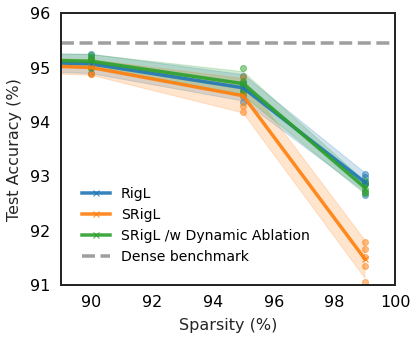

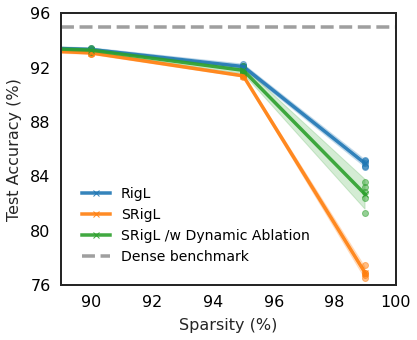

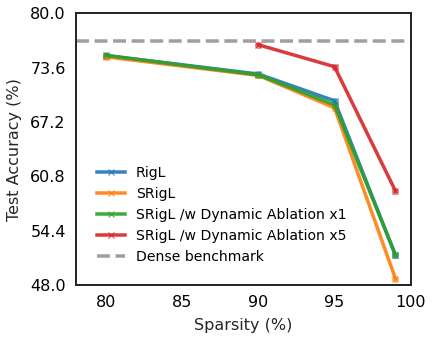

In [96]:

def get_accuracy_vs_sparsity_plot(model_name, ids, dense_benchmark_value, plot_99_sparsity=True, ylim=[0.9,1.0], xlim=[0.49,1.0], plot_error_bars: bool = True):
    # _BENCHMARK_VALUE = 0.9506

    plot_df = df.loc[ids].copy().sort_values(by="rigl.dense_allocation")
    plot_df["rigl.dynamic_ablation"].fillna(False, inplace=True)
    plot_df = plot_df.loc[plot_df["state"] == "finished"]
    if not plot_99_sparsity:
      plot_df = plot_df.loc[plot_df["rigl.dense_allocation"] != 0.01]
    plot_df["sparsity"] = (1-plot_df["rigl.dense_allocation"])*100
    plot_df["best_accuracy"] = plot_df["best_accuracy"]*100
    plot_dfs = []
    fig, ax = plt.subplots(figsize=(6,5))


    for idx, (epoch, fan_in, dynamic_ablation) in enumerate(plot_df.groupby(["epoch", "rigl.const_fan_in", "rigl.dynamic_ablation"], dropna=False).count().index.unique()):
        # print(epoch, fan_in, dynamic_ablation)   
        df_slice = plot_df.loc[(plot_df["rigl.const_fan_in"] == fan_in) & (plot_df["rigl.dynamic_ablation"] == dynamic_ablation) & (plot_df["epoch"] == epoch)]            
        name, color = series_name_plot_mapper(fan_in, dynamic_ablation, plot_df["epoch"].unique(), int(epoch))
        agg_results = get_confidence_bounds_df(df_slice, target_col="best_accuracy")
        # display(agg_results)
        ax.plot(
            agg_results["sparsity"], agg_results["mean"], marker='x', label=name, color=color, alpha=0.9
        )
        if plot_error_bars:
            ax.fill_between(
                agg_results["sparsity"],
                agg_results["upper_bound"],
                agg_results["lower_bound"],
                color=color,
                alpha=0.20
            )
        ax.scatter(
            df_slice["sparsity"], df_slice["best_accuracy"], marker='o', color=color, alpha=0.5
        )

    ax.plot(xlim, [dense_benchmark_value*100, dense_benchmark_value*100], "--",  label="Dense benchmark", color=_COLORS[-3], alpha=0.75)
    model_name_dict = dict(
        resnet18="ResNet18",
        wide_resnet22="WideResNet22"
    )
    #plt.title(f"{model_name_dict[_MODEL]} CIFAR-10 Validation Set Accuracy vs. Sparsity")
    plt.xlabel('Sparsity (%)')
    plt.ylabel('Test Accuracy (%)')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    
    tick_spaces=5
    y_tick_eps = (max(ylim) - min(ylim))/tick_spaces
    y_ticks = [min(ylim)+y_tick_eps*x for x in range(tick_spaces+1)]
    ax.set_yticks(y_ticks)
    # ax.set_yscale("log")
    fig_name = f"{model_name}_cifar_results"
    fig.savefig(f"{model_name}.png", dpi=600, bbox_inches="tight")
    fig.savefig(f"{model_name}.svg",format="svg", bbox_inches="tight")
    return fig

resnet18_params=dict(
    ids = resnet_ids,
    model_name ="../fig/resnet18",
    dense_benchmark_value = _RESNET18_BENCHMARK,
    plot_99_sparsity=True,
    ylim=[91,96],
    xlim=[89,100]
)

wide_resnet22_params=dict(
    ids = wide_res_ids,
    model_name ="../fig/wide_resnet22",
    dense_benchmark_value = _WIDE_RESNET_BENCHMARK,
    plot_99_sparsity=True,
    ylim=[76,96],
    xlim=[89,100]
)

imagenet_params=dict(
    ids = imagenet.index.to_list(),
    model_name ="../fig/resnet50",
    dense_benchmark_value = _IMAGENET_BENCHMARK,
    plot_99_sparsity=True,
    ylim=[48,80],
    xlim=[78,100],
    plot_error_bars=True
)

fig = get_accuracy_vs_sparsity_plot(**resnet18_params)
fig = get_accuracy_vs_sparsity_plot(**wide_resnet22_params)
fig = get_accuracy_vs_sparsity_plot(**imagenet_params)
fig.show()


/home/mike/condensed-sparsity/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/mike/condensed-sparsity/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/mike/condensed-sparsity/.venv/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2162: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/mike/condensed-sparsity/.venv/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2163: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/home/mike/condensed-sparsity/.venv/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2162: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/mike/condensed-s

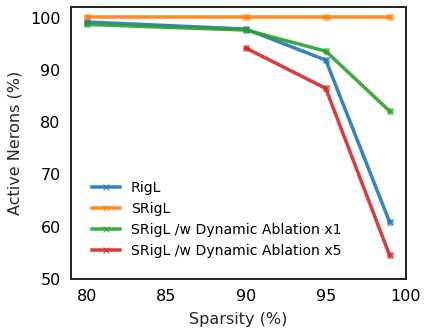

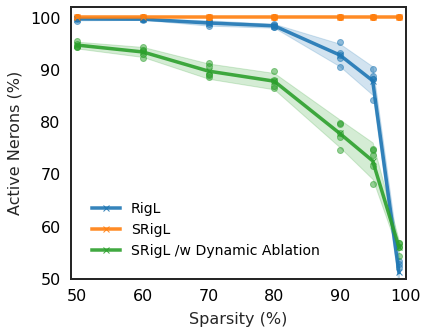

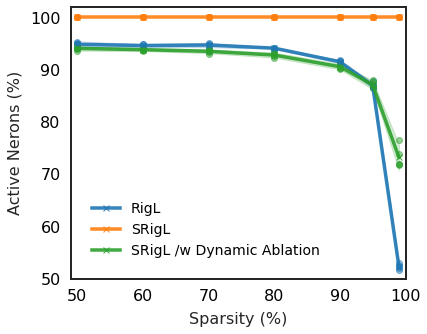

In [111]:
def plot_active_neurons_vs_sparsity(df, model_name="", ylim=[90,100], xlim=[49,100]):
    _TARGET_COL="_TOTAL_PERCENTAGE_ACTIVE_NEURONS"
    df=df.copy(deep=True)
    df = df.sort_values(by="rigl.dense_allocation")
    df["sparsity"] = (1-df["rigl.dense_allocation"])*100
    plot_dfs = []
    fig, ax = plt.subplots(figsize=(6,5))

    for idx, (epoch, fan_in, dynamic_ablation) in enumerate(df.groupby(["epoch", "rigl.const_fan_in", "rigl.dynamic_ablation"], dropna=False).count().index.unique()): 
        df_slice = df.loc[(df["rigl.const_fan_in"] == fan_in) & (df["rigl.dynamic_ablation"] == dynamic_ablation) & (df["epoch"] == epoch)]    
        name, color = series_name_plot_mapper(fan_in, dynamic_ablation, df["epoch"].unique(), int(epoch))
        agg_results = get_confidence_bounds_df(df_slice, target_col=_TARGET_COL)
        # display(agg_results)
        ax.plot(
            agg_results["sparsity"], agg_results["mean"], marker='x', label=name, color=color, alpha=0.9
        )
        ax.fill_between(
            agg_results["sparsity"],
            agg_results["upper_bound"],
            agg_results["lower_bound"],
            color=color,
            alpha=0.20
        )
        ax.scatter(
            df_slice["sparsity"], df_slice[_TARGET_COL], marker='o', color=color, alpha=0.5
        )

    plt.xlabel('Sparsity (%)')
    plt.ylabel('Active Nerons (%)')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    tick_spaces=5
    y_tick_eps = (max(ylim)-2 - min(ylim))/tick_spaces
    y_ticks = [int(min(ylim)+y_tick_eps*x) for x in range(tick_spaces+1)]
    ax.set_yticks(y_ticks)
    fig.savefig(f"{model_name}_perc_active.png", dpi=600, bbox_inches="tight")
    fig.savefig(f"{model_name}_perc_active.svg",format="svg", bbox_inches="tight")
    return fig

# sweep_id_ablation_exp = "a2uywunn"
# df.loc[df["sweep_id"]==sweep_id_ablation_exp]["rigl.dense_allocation"].unique()

# resnet18_const_fan_false_ids=df.loc[(df["sweep_id"]==sweep_id_ablation_exp) & (df["model"]=="resnet18")].index.to_list()
# wide_resnet22_const_fan_false_ids=df.loc[(df["sweep_id"]==sweep_id_ablation_exp) & (df["model"]=="wide_resnet22")].index.to_list()
# imagenet_ids = imagenet.loc[imagenet["rigl.dynamic_ablation"] == True].index
# fig = plot_active_neurons_vs_sparsity(imagenet.loc[imagenet_ids], "imagenet", ylim=[58, 100], xlim=[0.79, 1.0])
# fig = plot_active_neurons_vs_sparsity(df.loc[new_high_sparse_ids+resnet18_const_fan_false_ids], "resnet18", ylim=[50, 100])
# fig = plot_active_neurons_vs_sparsity(df.loc[wide_const_fan_ids+wide_resnet22_const_fan_false_ids], "wide_resnet22", ylim=[50, 100])
fig = plot_active_neurons_vs_sparsity(imagenet, "imagenet", ylim=[50, 102], xlim=[79, 100])
fig = plot_active_neurons_vs_sparsity(df.loc[resnet_ids], "resnet18", ylim=[50, 102])
fig = plot_active_neurons_vs_sparsity(df.loc[wide_res_ids], "wide_resnet22", ylim=[50, 102])

# Min Salient

/tmp/ipykernel_700603/1529073755.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_sal_df["epoch"] = min_sal_df.loc[min_sal_df["epoch"]==249, 'epoch'] = 250


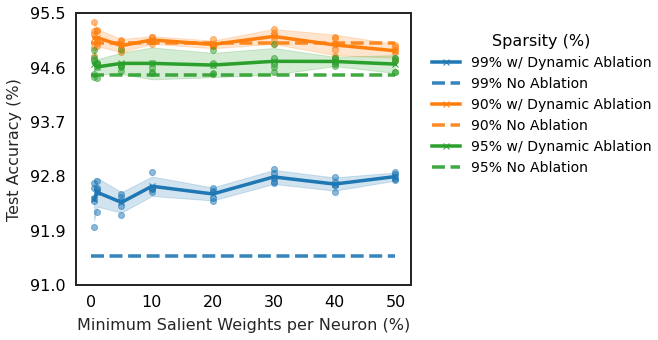

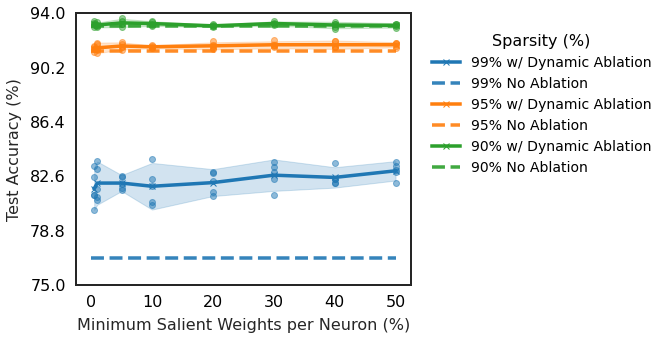

In [164]:
## Hyperparam search for min salient

def plot_min_salient_sweep(df, model_name="", ylim=[90,100], xlim=[49,100]):
    _TARGET_COL="best_accuracy"
    x_col = "rigl.min_salient_weights_per_neuron"
    df=df.copy(deep=True)
    df[_TARGET_COL] = df[_TARGET_COL]*100
    df[x_col] = df[x_col]*100
    df = df.sort_values(by=x_col)
    df["sparsity"] = (1-df["rigl.dense_allocation"])*100
    fig, ax = plt.subplots(figsize=(6,5))
    epoch_values = sorted(df["epoch"].unique())
    # epoch_color_value_inc = {epoch: 2+i for i, epoch in enumerate(epoch_values)}
    color_inc = 0
    
    for sparsity in df["sparsity"].unique():
        if not sparsity > 80:
            continue
        for epoch in df["epoch"].unique():
            color = _COLORS[color_inc]
            color_inc+=1
        df_slice_ablation = df.loc[(df["sparsity"] == sparsity) & (df["epoch"] == epoch) & (df["rigl.dynamic_ablation"]==True)]
        df_slice_no_ablation = df.loc[(df["sparsity"] == sparsity) & (df["epoch"] == epoch) & (df["rigl.dynamic_ablation"]==False)]
        
        # Dynamic
        name = f"{sparsity:.0f}% w/ Dynamic Ablation"
        if len (epoch_values) >1:
            steps_multiplier = round(epoch / epoch_values[0])
            name = name + f" x{steps_multiplier}"
        agg_results = get_confidence_bounds_df(df_slice_ablation, target_col=_TARGET_COL, x_col=x_col)
        ax.plot(
            agg_results[x_col], agg_results["mean"], marker='x', label=name, color=color, alpha=1.0
        )
        ax.fill_between(
            agg_results[x_col],
            agg_results["upper_bound"],
            agg_results["lower_bound"],
            color=color,
            alpha=0.20
        )
        ax.scatter(
            df_slice_ablation[x_col], df_slice_ablation[_TARGET_COL], marker='o', color=color, alpha=0.5
        )
        benchmark_val = df_slice_no_ablation[_TARGET_COL].mean()
        ax.plot(xlim, [benchmark_val, benchmark_val], "--",  label=f"{sparsity:.0f}% No Ablation", color=color, alpha=0.9)

    plt.xlabel('Minimum Salient Weights per Neuron (%)')
    plt.ylabel('Test Accuracy (%)')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)
    ax.legend(bbox_to_anchor=(1,1))
    ax.get_legend().set_title("Sparsity (%)")
    ax.set_ylim(ylim)
    # ax.set_xlim(xlim)
    # ax.set_xscale("log")
    tick_spaces=5
    y_tick_eps = (max(ylim) - min(ylim))/tick_spaces
    y_ticks = [min(ylim)+y_tick_eps*x for x in range(tick_spaces+1)]
    ax.set_yticks(y_ticks)
    fig.savefig(f"{model_name}_salient_sweep.png", dpi=600, bbox_inches="tight")
    fig.savefig(f"{model_name}_salient_sweep.svg",format="svg", bbox_inches="tight")
    return fig


min_sal_df = df.loc[df["tags"].str.contains("sweep_1fik36lx")]
min_sal_df["epoch"] = min_sal_df.loc[min_sal_df["epoch"]==249, 'epoch'] = 250
min_sal_df = pd.concat([min_sal_df, resnet18_no_ablation, wide_resnet22_no_ablation])
fig = plot_min_salient_sweep(min_sal_df.loc[min_sal_df["model"]=="resnet18"], model_name="resnet18", ylim=[91,95.5], xlim=[0,50])
fig.show()
fig = plot_min_salient_sweep(min_sal_df.loc[min_sal_df["model"]=="wide_resnet22"], model_name="wide_resnet22",ylim=[75,94], xlim=[0,50])
fig.show()

In [187]:
imagenet.groupby(_GROUPBY_VARS).count()

ITOP Rate  \
rigl.const_fan_in rigl.dense_allocation rigl.dynamic_ablation rigl.min_salient_weights_per_neuron              
False             0.01                  True                  0.005                                        1   
                  0.05                  True                  0.005                                        1   
                  0.10                  True                  0.005                                        1   
                  0.20                  True                  0.005                                        1   
True              0.01                  False                 0.000                                        1   
                                        True                  0.005                                        1   
                                                              0.300                                        1   
                  0.05                  False                 0.000                                        1   
                                        True                  0.005                                        1   
                                                              0.300                                        1   
                  0.10                  False                 0.000                                        1   
                                        True                  0.005                                        1   
                                                              0.300                                        1   
                  0.20                  False                 0.000                                        1   
                                        True                  0.300                                        1   

                                                                                                   Learning Rate  \
rigl.const_fan_in rigl.dense_allocation rigl.dynamic_ablation rigl.min_salient_weights_per_neuron                  
False             0.01                  True                  0.005                                            1   
                  0.05                  True                  0.005                                            1   
                  0.10                  True                  0.005                                            1   
                  0.20                  True                  0.005                                            1   
True              0.01                  False                 0.000                                            1   
                                        True                  0.005                                            1   
                                                              0.300                                            1   
                  0.05                  False                 0.000                                            1   
                                        True                  0.005                                            1   
                                                              0.300                                            1   
                  0.10                  False                 0.000                                            1   
                                        True                  0.005                                            1   
                                                              0.300                                            1   
                  0.20                  False                 0.000                                            1   
                                        True                  0.300                                            1   

                                                                                                   Training Loss  \
rigl.const_fan_in rigl.dense_allocation rigl.dynamic_ablation rigl.min_salient_weights_per_neuron        

In [189]:
def get_results_table(df, ids, benchmark_value, caption, label, ) -> str:
    df = get_df_for_table(df, ids)
    df=df.copy(deep=True)
    table_str=""
    table_header=(
        "\\begin{table}[h!]\n`"
        "\\begin{center}\n"
        "\\begin{tabular}{ c | c | c | c } \n"
        "\\multirow{3}{*}{\\textbf{Sparsity}} & \\multicolumn{3}{c}{\\textbf{Test Accuracy (\%)}}\\\\ & RigL & SRigL & SRigL \\\\ \\textbf{(\%)} & & &  w/ Ablation \\\\"
        "\n\\hline\n"
    )
    benchmark_row= f"0  & ${benchmark_value*100:.2f}$ & -- \\\\"
    table_str+=table_header+benchmark_row
    df = df.groupby(["rigl.dense_allocation", "rigl.const_fan_in", "rigl.dynamic_ablation"], dropna=True).agg(["mean", "std"])
    df = df.sort_values(by=("sparsity", "mean"), ascending=True)


    for s in df["sparsity"]["mean"].unique():
        df_slice=df.loc[df["sparsity"]['mean']==s]
        row = get_table_row(df_slice, s)
        table_str+="\n"
        table_str+=row
    
    table_footer = (
        "\\hline\n"
        "\\end{tabular}\n"
        f"\\caption{{{caption}}}\\label{{table:{label}}}\n"
        "\\end{center}\n"
        "\\end{table}\n"

    )
    table_str+=table_footer
    return table_str

def get_df_for_table(df, ids, fill_best_nan:bool=True,):
    interested_cols=[
        "rigl.const_fan_in",
        "rigl.dynamic_ablation",
        "rigl.dense_allocation",
        "accuracy",
        "best_accuracy",
        "sparsity"
    ]
    df["sparsity"] = 1-df["rigl.dense_allocation"]
    df_slice = df.loc[ids][interested_cols]
    df = df_slice.copy(deep=True)
    if fill_best_nan:
        df["best_accuracy"].loc[df["best_accuracy"].isna()] = df["accuracy"].loc[df["best_accuracy"].isna()]
        # df["rigl.dynamic_ablation"].fillna(False, inplace=True)
    df["+/-"] = df["best_accuracy"] - df["accuracy"]
    return df
def get_bold_text(mean_std_name):
    for idx, (mean, std, name) in enumerate(mean_std_name):
        others=list(range(len(mean_std_name)))
        others.pop(idx)
        bold_text = True
        for other in others:
            if mean - std < mean_std_name[other][0]+mean_std_name[other][1]:
                bold_text = False
        if bold_text:
            name = f"\\mathbf{{{name}}}"
            mean_std_name[idx][2] = name
    return mean_std_name

def get_table_row(df_slice, s):
    # Index is dense_alloc, const_fan, dynamic_ablation
    srigl_ablation_slice = df_slice.loc[:, True, True]
    srigl_ablation_mean=srigl_ablation_slice["best_accuracy"]["mean"].item()
    srigl_ablation_std=srigl_ablation_slice["best_accuracy"]["std"].item()
    srigl_ablation_text = f"{srigl_ablation_mean*100:.2f}"
    if not np.isnan(srigl_ablation_std):
        srigl_ablation_text += f"\\pm {srigl_ablation_std*100:.2f}"
    else:
        srigl_ablation_std=0
    vanilla_slice = df_slice.loc[:, False, :]
    vanilla_mean=vanilla_slice["best_accuracy"]["mean"].item()
    vanilla_std=vanilla_slice["best_accuracy"]["std"].item()
    vanilla_text = f"{vanilla_mean*100:.2f}"
    if not np.isnan(vanilla_std):
        vanilla_text += f"\\pm {vanilla_std*100:.2f}"
    else:
        vanilla_std=0
    no_ablation_slice = df_slice.loc[:, True, False]
    no_ablation_mean=no_ablation_slice["best_accuracy"]["mean"].item()
    no_ablation_std=no_ablation_slice["best_accuracy"]["std"].item()
    no_ablation_text = f"{no_ablation_mean*100:.2f}"
    if not np.isnan(no_ablation_std):
        no_ablation_text += f"\\pm {no_ablation_std*100:.2f}"
    else:
        no_ablation_text=0

    mean_std_name = [
        [vanilla_mean, vanilla_std, vanilla_text],
        [no_ablation_mean, no_ablation_std, no_ablation_text],
        [srigl_ablation_mean, srigl_ablation_std, srigl_ablation_text],
    ]
    mean_std_name = get_bold_text(mean_std_name)
    vanilla_text=mean_std_name[0][2]
    no_ablation_text=mean_std_name[1][2]
    srigl_ablation_text=mean_std_name[2][2]
    row_text = f"{s*100:.0f} & ${vanilla_text}$ & ${no_ablation_text}$ & ${srigl_ablation_text}$ \\\\"
    return row_text



resnet18_table_args = dict(
    df=df,
    ids=resnet_ids,
    benchmark_value=_RESNET18_BENCHMARK,
    caption= "Test accuracy of ResNet-18 trained with RigL on CIFAR-10. 95\% Confidence intervals are reported over five runs",
    label="resnet18_cifar10_table"
    
)

wide_resnet_table_args = dict(
    df=df,
    ids=wide_res_ids,
    benchmark_value=_WIDE_RESNET_BENCHMARK,
    caption= "Test accuracy of Wide ResNet-22 trained with RigL on CIFAR-10. 95\% Confidence intervals are reported over five runs",
    label="wide_resnet22_table"
    
)

# imagenet_ids = imagenet.loc[imagenet["rigl.dynamic_ablation"] == True].index
imagenet_ids = imagenet.index
imagenet_table_args = dict(
    df=df,
    ids=imagenet_ids,
    benchmark_value=_IMAGENET_BENCHMARK,
    caption= "Test accuracy of ResNet-50 trained with RigL on ImageNet.",
    label="resnet50_imagenet_table"
    
)
# for kwargs in [resnet18_table_args, wide_resnet_table_args, imagenet_table_args]:
#     print(get_results_table(**kwargs))
for kwargs in [imagenet_table_args]:
    print(get_results_table(**kwargs))


#         50 & 95.40 $\pm 0.06$ & $95.45 \pm 0.13$ \\
#         60 & 95.45 $\pm 0.08$ & $95.39 \pm 0.10$ \\
#         70 & $95.41 \pm 0.10$ & 95.38 $\pm 0.12$ \\
#         80 & $95.20 \pm 0.08$ & 95.25 $\pm 0.17$ \\
#         90 & $95.06 \pm 0.14$ & 95.11 $\pm 0.19$ \\
#         95 & $94.62 \pm 0.20$ & 94.74 $\pm 0.15$ \\
#         99 & $\mathbf{92.88 \pm 0.14}$ & 92.43 $\pm 0.28$ \\
#          \hline
#         \end{tabular}
#     \caption{Test accuracy of ResNet-18 trained with RigL on CIFAR-10. Standard deviations are reported over five runs.}\label{table:riglexperiments}
#     \end{center}
# \end{table}

\begin{table}[h!]
`\begin{center}
\begin{tabular}{ c | c | c | c } 
\multirow{3}{*}{\textbf{Sparsity}} & \multicolumn{3}{c}{\textbf{Test Accuracy (\%)}}\\ & RigL & SRigL & SRigL \\ \textbf{(\%)} & & &  w/ Ablation \\
\hline
0  & $76.74$ & -- \\
80 & $74.98$ & $\mathbf{0}$ & $\mathbf{75.01}$ \\
90 & $72.81$ & $\mathbf{0}$ & $74.48\pm 2.51$ \\
95 & $69.66$ & $\mathbf{0}$ & $71.43\pm 3.18$ \\
99 & $51.47$ & $\mathbf{0}$ & $55.30\pm 5.31$ \\\hline
\end{tabular}
\caption{Test accuracy of ResNet-50 trained with RigL on ImageNet.}\label{table:resnet50_imagenet_table}
\end{center}
\end{table}



/tmp/ipykernel_700603/810869784.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["best_accuracy"].loc[df["best_accuracy"].isna()] = df["accuracy"].loc[df["best_accuracy"].isna()]


In [115]:
# Tables


    
    
# updated_df = print_table(df, resnet_ids, fill_best_nan=True)
    
    